# An international e-commerce company wants to discover key insights from its customer database. They want to use some of the most advanced machine-learning techniques to study their customers. The company sells electronic products.

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company has a big Warehouse which is divided into blocks such as A, B, C, D, and E.

Mode of shipment: The Company Ships the products in multiple ways such as Ship, Flight, and Road.

Customer care calls: The number of calls made from inquiries for inquiries of the shipment.

Customer rating: The company has rated every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchases.

Product importance: The company has categorized the product in various parameters such as low, medium, and high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in grams: It is the weight in grams.

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has 
reached on time.

This data of Product Shipment Tracking, answer instantly to your questions:

1. What was the Customer Rating? And was the product delivered on time?

2. Is the Customer query being answered?

3. If Product importance is high. having the highest rating or being delivered on time?

4. Build a classification model to predict if a product will arrive on time or not.

In [58]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [59]:
ecommerce_dataset = pd.read_csv(r"D:\Rohit\Data Science Class\Thane Dec BAtch\Train.csv")
ecommerce_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [60]:
ecommerce_dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [61]:
ecommerce_dataset.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [62]:
ecommerce_dataset.shape

(10999, 12)

# Identify missing values

In [63]:
ecommerce_dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No missing values are found.

# Identify duplicate values

In [64]:
ecommerce_dataset[ecommerce_dataset.duplicated()].sum()

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

No duplicate values are found.

# Separate numeric & categorical column

In [65]:
# Categorical data
categorical = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating']

# Numerical data
numeric = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Identify outliers

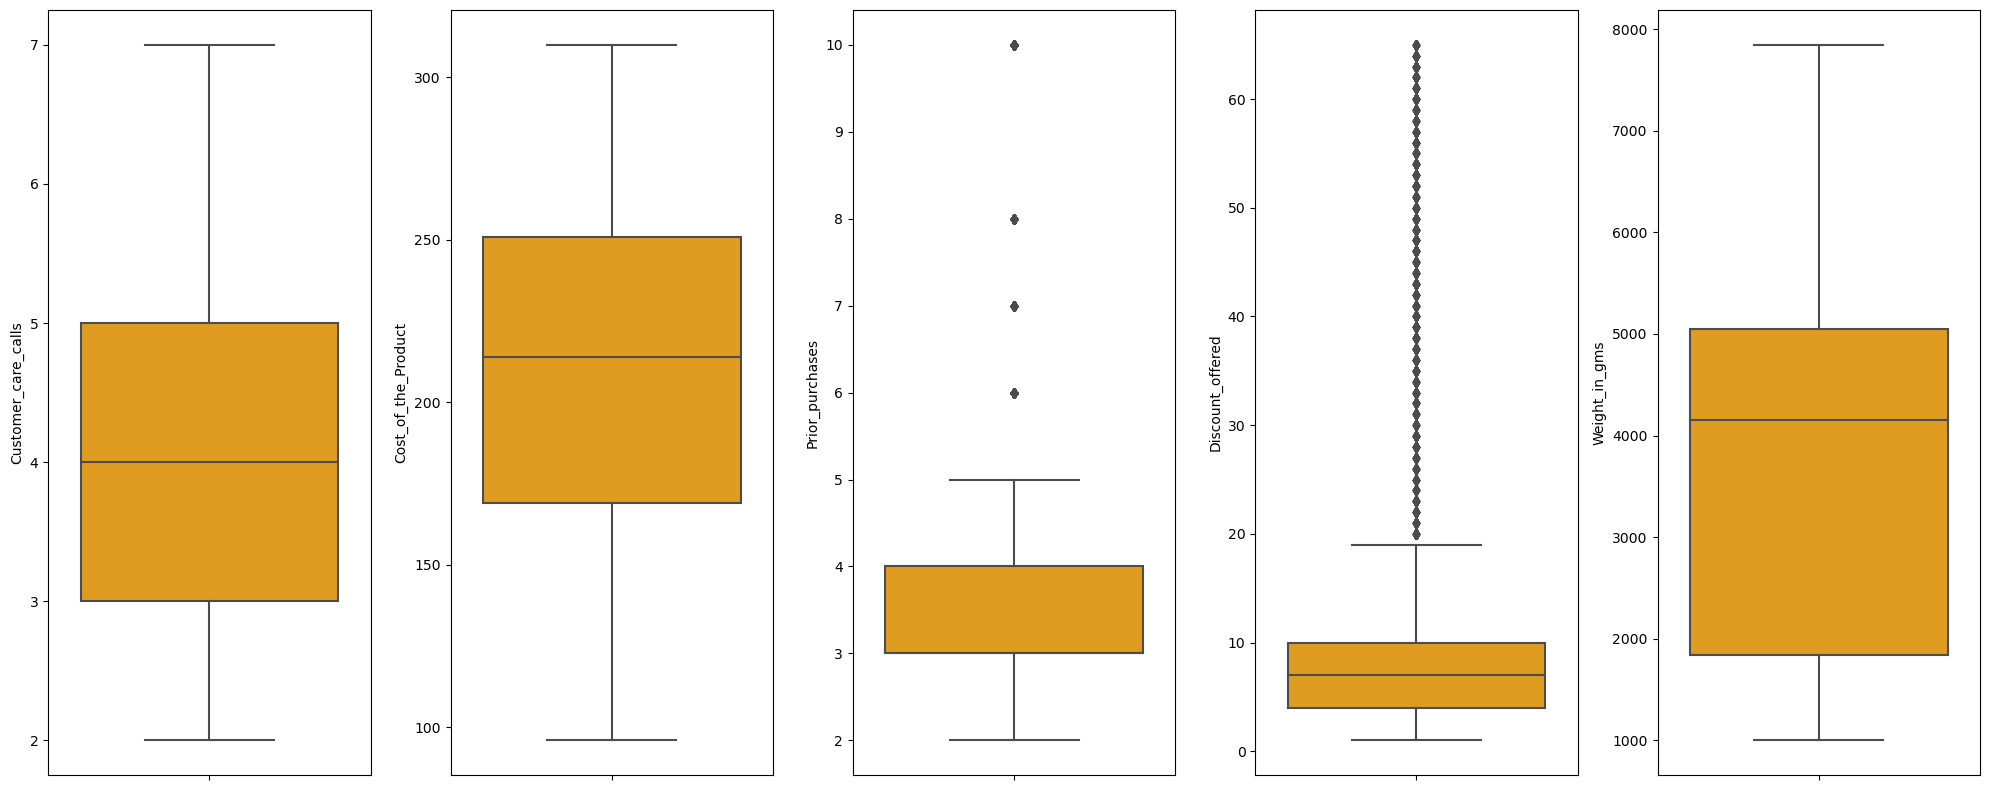

In [66]:
# Identify outliers using boxplot
plt.figure(figsize = (20,8))
for i in range(0, len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.boxplot(y = ecommerce_dataset[numeric[i]], color='orange')
    plt.tight_layout()

Identify outlier using IQR

In [67]:
# Identify outlier using IQR
for col in numeric:
    Q1 = ecommerce_dataset[col].quantile(0.25)
    Q3 = ecommerce_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    
    nilai_min = ecommerce_dataset[col].min()
    nilai_max = ecommerce_dataset[col].max()
    lower_lim = Q1 - (1.5 * IQR)
    upper_lim = Q3 + (1.5 * IQR)
    
    # Identify low outlier

    if (nilai_min < lower_lim):
        print('low outlier is not found in columns', col, '<', lower_lim, '\n')
        print('Total pf Low outlier in columns', col, ':', len(list(ecommerce_dataset[ecommerce_dataset[col] < lower_lim].index)), '\n')
    elif (nilai_max > upper_lim):
        print('High outlier is found in columns', col, '>', upper_lim, '\n')
        print('Total of high outlier in columns', col, ':', len(list(ecommerce_dataset[ecommerce_dataset[col] > upper_lim].index)), '\n')
    else :
        print('outlier is not found in columns', col, '\n')

outlier is not found in columns Customer_care_calls 

outlier is not found in columns Cost_of_the_Product 

High outlier is found in columns Prior_purchases > 5.5 

Total of high outlier in columns Prior_purchases : 1003 

High outlier is found in columns Discount_offered > 19.0 

Total of high outlier in columns Discount_offered : 2209 

outlier is not found in columns Weight_in_gms 



In [68]:
# We handle outliers by replacing the value with the upper bound or lower bound
for col in ['Prior_purchases', 'Discount_offered']:
    Q1 = ecommerce_dataset[col].quantile(0.25)
    Q3 = ecommerce_dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Replace values that are above the upper bound with the upper bound
    ecommerce_dataset[col] = ecommerce_dataset[col].apply(lambda x: upper_bound if x > upper_bound else x)

    # Replace values that are below the lower bound with the lower bound
    ecommerce_dataset[col] = ecommerce_dataset[col].apply(lambda x: lower_bound if x < lower_bound else x)

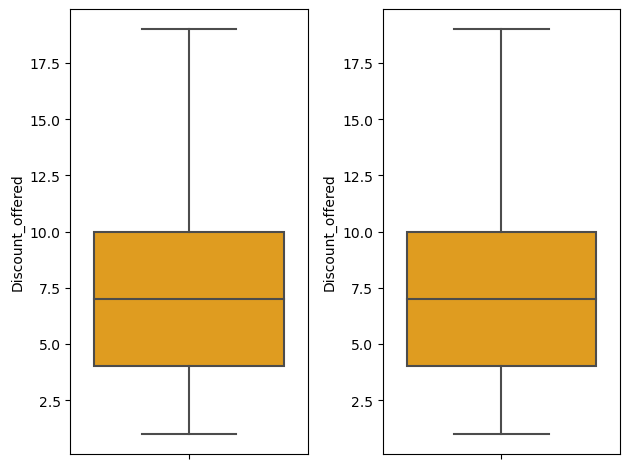

In [69]:
for i in range(0, len(['Prior_purchases', 'Discount_offered'])):
    plt.subplot(1,2, i+1)
    sns.boxplot(y = ecommerce_dataset[col], color = 'orange', orient = 'V')
    plt.tight_layout()

We didn't remove the outliers, but replacing with upper bound and lower bound. And we can see in the visualization above, there is no outliers detected.

# Exploratory Data Analysis

In [70]:
ecommerce_dataset.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

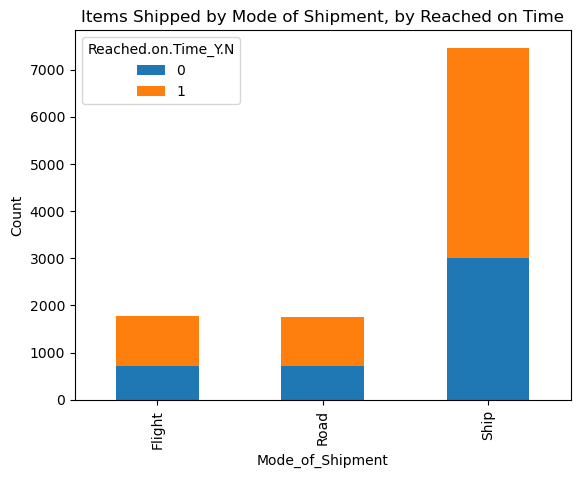

In [71]:
grouped = ecommerce_dataset.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Mode_of_Shipment')
plt.ylabel('Count')
plt.title('Items Shipped by Mode of Shipment, by Reached on Time')
plt.show()

This visualization displays the various methods of shipment that were utilized for delivering the products.

The mode of shipment that was most commonly used to send the products was "Ship", with over 7000 shipments sent through it.

Ship mode had a higher percentage of products that reached their destination on time compared to flight and road modes.

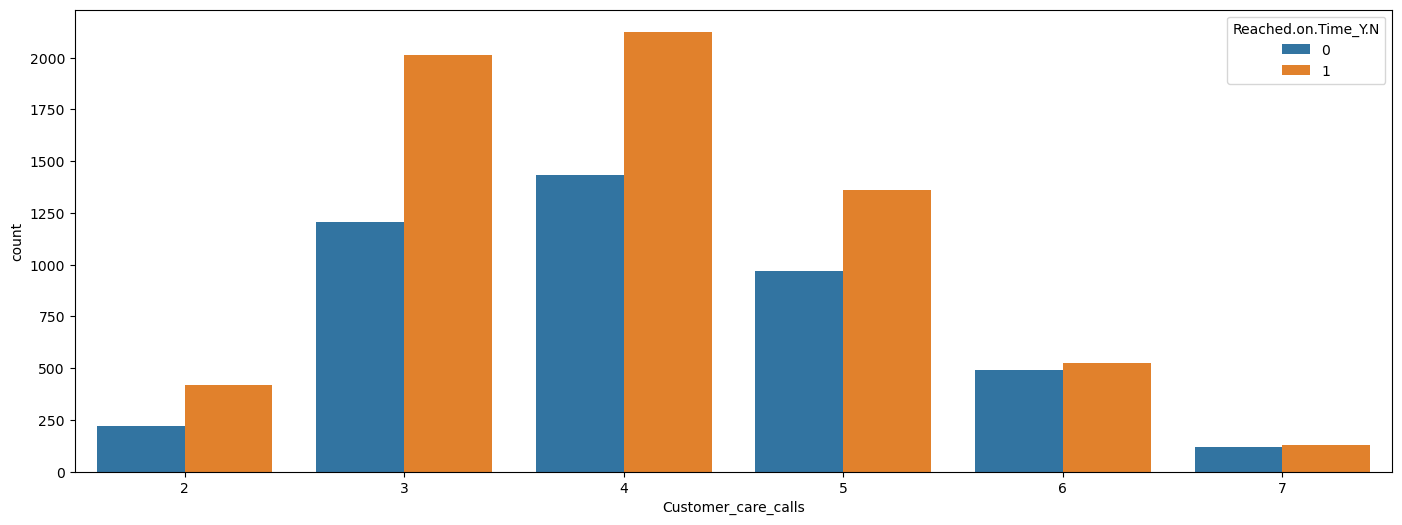

In [72]:
plt.figure(figsize = (17, 6))
sns.countplot(x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = ecommerce_dataset)
plt.show()

This graph illustrates the correlation between the number of customer care calls and whether or not the deliveries were made on time.

For over 2000 products, the maximum number of calls allowed is 4.

The majority of shipments necessitate inquiries, and typically, there are between 3 to 5 calls made in regards to them.

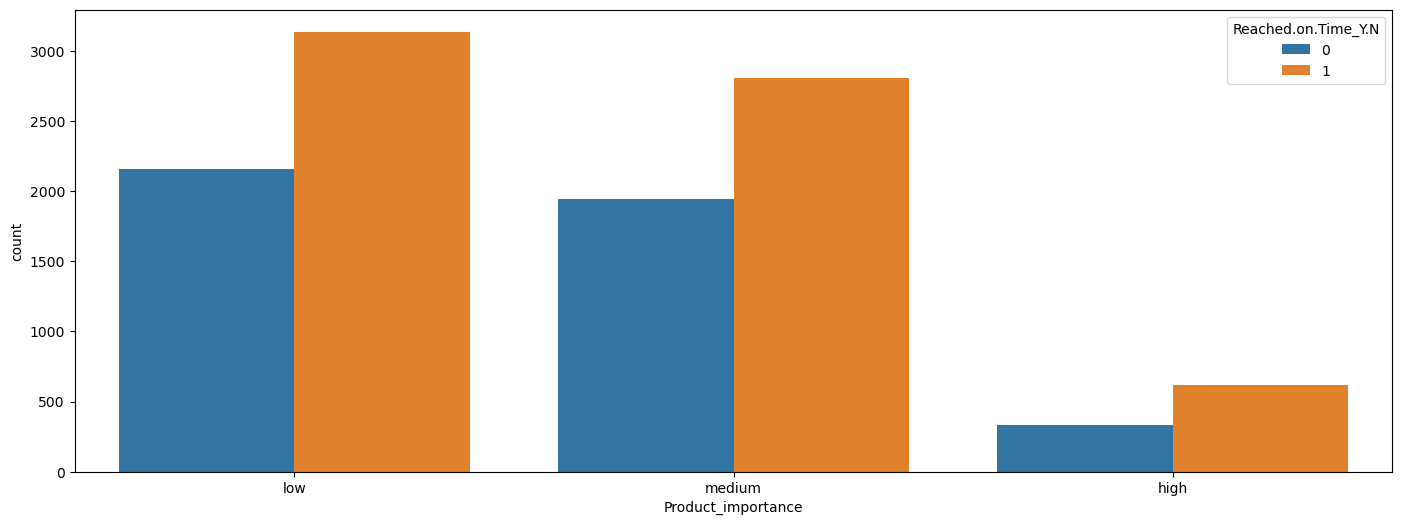

In [73]:
plt.figure(figsize = (17,6))
sns.countplot(x = 'Product_importance', hue = 'Reached.on.Time_Y.N', data = ecommerce_dataset)
plt.show()

This visualization represents the distribution of products across different order of importance categories - medium, low, and high - and whether they reached their destination on time or not.

The quantity of products categorized as "high importance" was comparatively lower than those categorized as "medium" and "low".

Products that did not reach their destination on time were more numerous than those that did, across all levels of importance.

In [74]:
import plotly.express as px
warehouse_counts = ecommerce_dataset['Warehouse_block'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=warehouse_counts, names=warehouse_counts.index, hole=0.5)

# Customize the colors and add labels and title
fig.update_traces(marker=dict(colors=px.colors.sequential.matter_r))
fig.update_traces(textinfo='percent+label')
fig.update_layout(width=650, height=400, title='Warehouse Blocks')

# Show the plot
fig.show()

This graph displays the usage of five warehouse blocks for product storage.

The F block had a greater quantity of stored products than the other blocks.

The remaining blocks have roughly equal quantities of stored products.

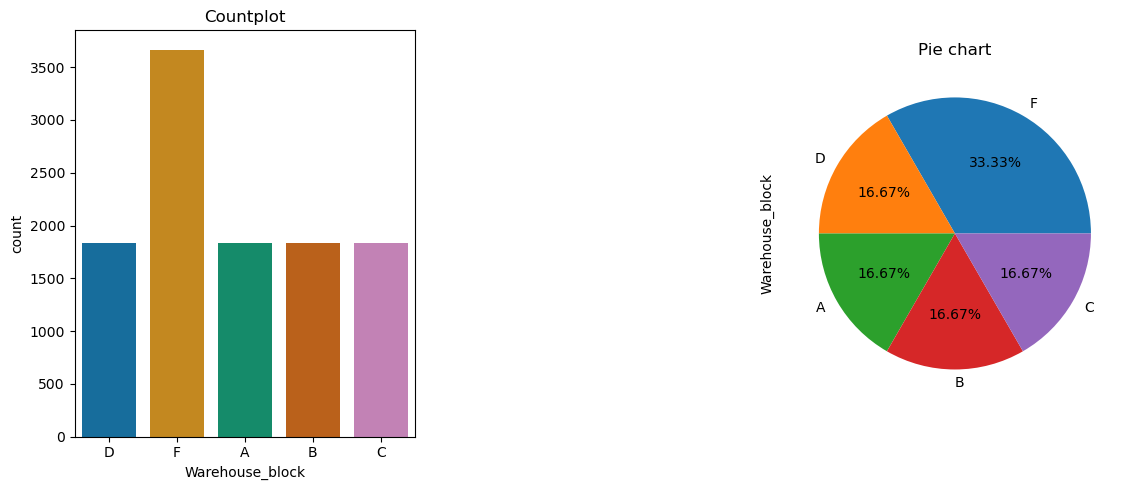

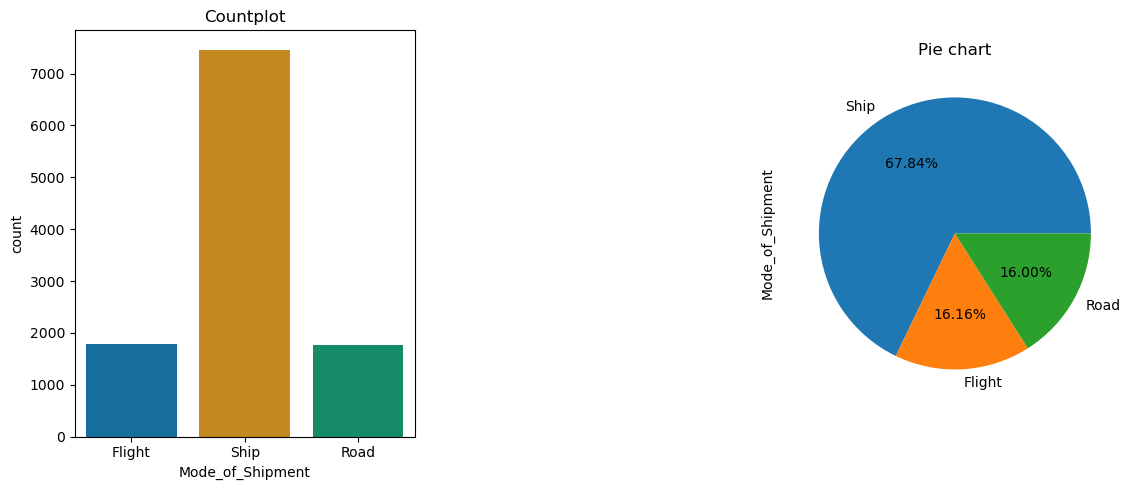

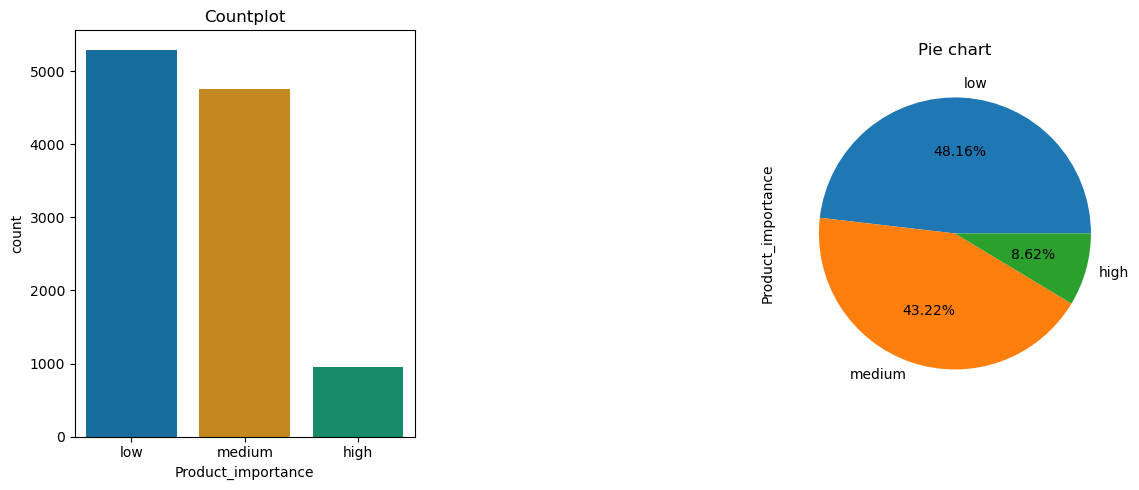

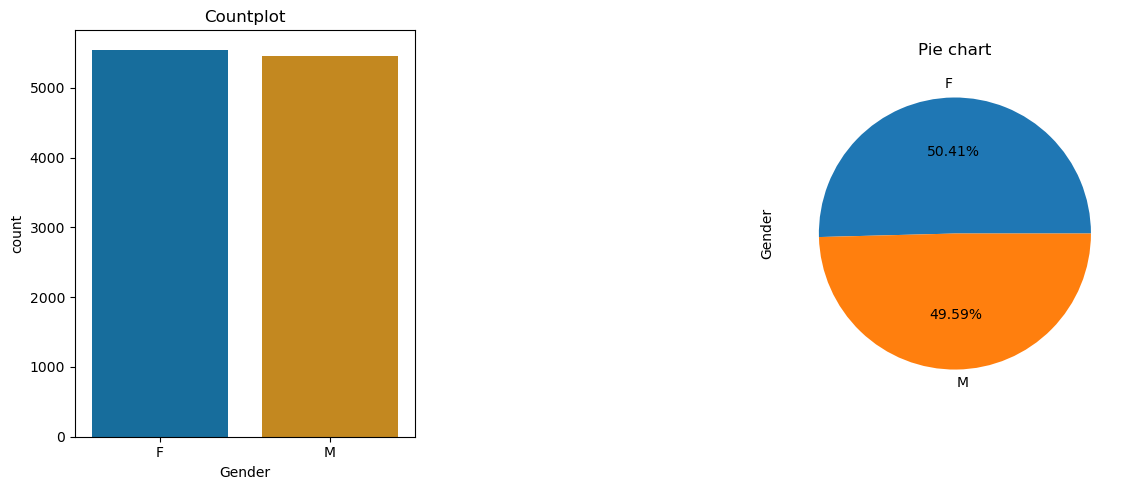

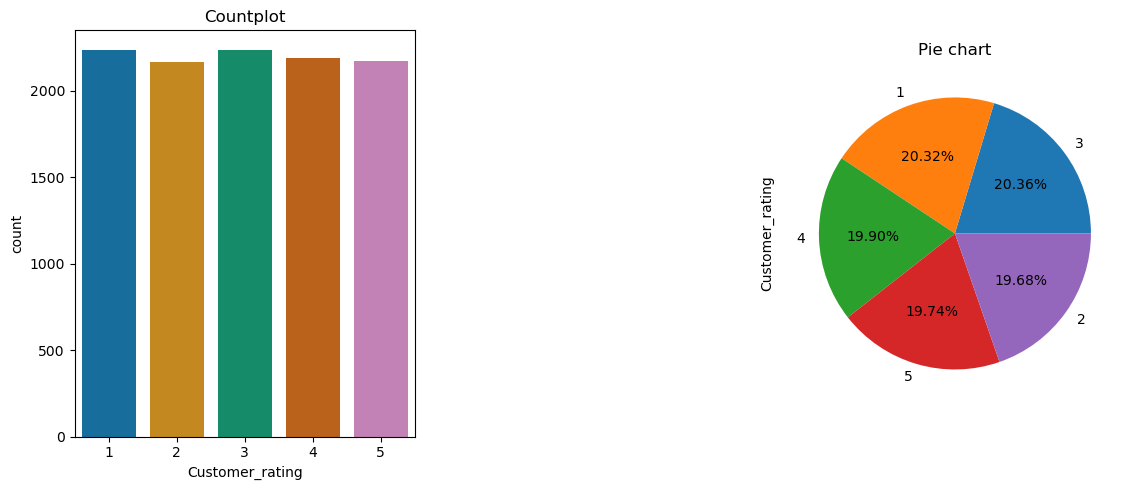

In [77]:
for col in categorical:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(141);
    sns.countplot(ecommerce_dataset[col], palette = 'colorblind', orient='v');
    plt.title('Countplot')
    plt.tight_layout();
    
    
    plt.subplot(143);
    ecommerce_dataset[col].value_counts().plot.pie(autopct='%1.2f%%');
    plt.title('Pie chart') 

<AxesSubplot:>

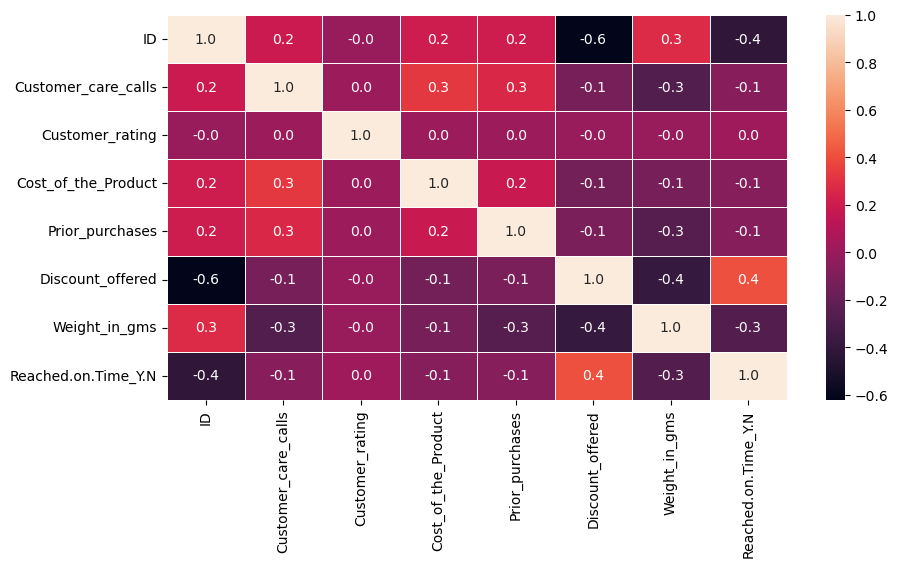

In [18]:
plt.figure(figsize = (10,5))
sns.heatmap(ecommerce_dataset.corr(), annot = True, linewidths=0.5, fmt = '.1f')

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the Categorical Variables
for col in ecommerce_dataset.columns:
    if ecommerce_dataset[col].dtype == 'object':
        ecommerce_dataset[col] = le.fit_transform(ecommerce_dataset[col])

In [20]:
ecommerce_dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3.0,1,0,19.0,1233,1
1,2,4,0,4,5,216,2.0,1,1,19.0,3088,1
2,3,0,0,2,2,183,4.0,1,1,19.0,3374,1
3,4,1,0,3,3,176,4.0,2,1,10.0,1177,1
4,5,2,0,2,2,184,3.0,2,0,19.0,2484,1


In [21]:
ecommerce_dataset = ecommerce_dataset.drop(['ID', 'Gender'], axis = 1)
ecommerce_dataset.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3.0,1,19.0,1233,1
1,4,0,4,5,216,2.0,1,19.0,3088,1
2,0,0,2,2,183,4.0,1,19.0,3374,1
3,1,0,3,3,176,4.0,2,10.0,1177,1
4,2,0,2,2,184,3.0,2,19.0,2484,1


# Observing and defining target variable

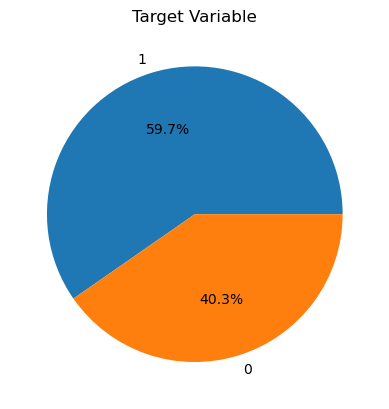

In [22]:
Reached_on_time = ecommerce_dataset['Reached.on.Time_Y.N'].value_counts()
plt.pie(Reached_on_time.values, labels = Reached_on_time.index, autopct = '%1.1f%%')

plt.title('Target Variable')
plt.show()

The class of target looks balance.

In [23]:
X = ecommerce_dataset.drop(['Reached.on.Time_Y.N'], axis = 1)
y = ecommerce_dataset['Reached.on.Time_Y.N']

In [24]:
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3.0,1,19.0,1233
1,4,0,4,5,216,2.0,1,19.0,3088
2,0,0,2,2,183,4.0,1,19.0,3374
3,1,0,3,3,176,4.0,2,10.0,1177
4,2,0,2,2,184,3.0,2,19.0,2484
...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2,1.0,1538
10995,1,2,4,1,232,5.0,2,6.0,1247
10996,2,2,5,4,242,5.0,1,4.0,1155
10997,4,2,5,2,223,5.5,2,2.0,1210


In [25]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

# Scaling the features using Standard Scaler

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(x_scaled)

       Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0             0.447189         -2.004158            -0.047711   
1             1.118034         -2.004158            -0.047711   
2            -1.565345         -2.004158            -1.799887   
3            -0.894500         -2.004158            -0.923799   
4            -0.223656         -2.004158            -1.799887   
...                ...               ...                  ...   
10994        -1.565345          0.638342            -0.047711   
10995        -0.894500          0.638342            -0.047711   
10996        -0.223656          0.638342             0.828377   
10997         1.118034          0.638342             0.828377   
10998         0.447189          0.638342            -1.799887   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0            -0.700755            -0.690722        -0.370875   
1             1.421578             0.120746        -1.250497   
2            -0.700755     

In [27]:
x = x_scaled
x.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,0.447189,-2.004158,-0.047711,-0.700755,-0.690722,-0.370875,-0.548034,1.707748,-1.468240
1,1.118034,-2.004158,-0.047711,1.421578,0.120746,-1.250497,-0.548034,1.707748,-0.333893
2,-1.565345,-2.004158,-1.799887,-0.700755,-0.565881,0.508748,-0.548034,1.707748,-0.159002
3,-0.894500,-2.004158,-0.923799,0.006689,-0.711529,0.508748,1.035735,0.231172,-1.502484
4,-0.223656,-2.004158,-1.799887,-0.700755,-0.545074,-0.370875,1.035735,1.707748,-0.703244


In [28]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

# Split train & test data

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)

# Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier model
gbc_model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01,
                                       max_depth = 3, min_samples_split = 2, min_samples_leaf = 1,
                                       max_features = None, subsample = 1.0, random_state = 42)

# Fit the model to your training data
gbc_model.fit(X_train, Y_train)

# Make predictions on the training and testing sets
Y_train_pred_gbc = gbc_model.predict(X_train)
Y_test_pred_gbc = gbc_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(Y_train, Y_train_pred_gbc)
test_acc = accuracy_score(Y_test, Y_test_pred_gbc)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6951926355267644
Test accuracy:  0.6904545454545454


In [31]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71       895
           1       0.92      0.52      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.78      0.69      0.68      2200



# AdaBoost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

abc_model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01,
                              algorithm = 'SAMME.R', random_state = 42)

abc_model.fit(X_train, Y_train)

# Make predictions on the training and testing sets
Y_train_pred_abc = abc_model.predict(X_train)
Y_test_pred_abc = abc_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(Y_train, Y_train_pred_abc)
test_acc = accuracy_score(Y_test, Y_test_pred_abc)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6710989885214229
Test accuracy:  0.6813636363636364


In [34]:
print(classification_report(Y_test,Y_test_pred_abc))

              precision    recall  f1-score   support

           0       0.59      0.74      0.65       895
           1       0.78      0.64      0.71      1305

    accuracy                           0.68      2200
   macro avg       0.68      0.69      0.68      2200
weighted avg       0.70      0.68      0.68      2200



# Extreme Gradient Boosting

In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='binary:logistic')

xgb_model.fit(X_train, Y_train)

# Make predictions on the training and testing sets
Y_train_pred_xgb = xgb_model.predict(X_train)
Y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(Y_train, Y_train_pred_xgb)
test_acc = accuracy_score(Y_test, Y_test_pred_xgb)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.9066939424934651
Test accuracy:  0.6581818181818182


# Hyper parameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [37]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [38]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.667 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.674 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.661 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.667 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.691 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.667 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.676 total time=   0.1s
[CV 3/5] END cols

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.657 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.674 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.673 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.677 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.660 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.652 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.674 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.665 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.653 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.647 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.672 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.655 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.670 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.652 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.692 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.682 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.668 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.663 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.694 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.643 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.679 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.660 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.673 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.657 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.653 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.681 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_w

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.670 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.649 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.648 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.666 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.680 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.670 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.696 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.680 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.664 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.646 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.683 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.673 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.641 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.635 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.666 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.659 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.662 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.637 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.647 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.694 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.666 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.656 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.690 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.691 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_we

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.670 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.662 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.669 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.662 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.642 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.674 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.657 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_we

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.653 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.648 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.659 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.664 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.654 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.649 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.646 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.663 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.670 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.665 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.647 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.686 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.677 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.651 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.662 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.660 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.648 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.647 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.638 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.655 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.684 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.667 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.643 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.682 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.682 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.670 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_we

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.667 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.661 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.647 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.641 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.655 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.658 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.666 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.649 total time=   0.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.655 total time=   0.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.663 total time=   0.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.657 total time=   0.6s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.645 total time=   0.6s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.645 total time=   0.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.654 total time=   0.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.684 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.662 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.660 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.679 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.677 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.681 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.662 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.677 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.660 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.680 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.654 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.650 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.671 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.666 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.675 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.670 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.690 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.684 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.676 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.661 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_we

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.677 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.658 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.648 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.670 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.668 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.672 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.663 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_we

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.661 total time=   0.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.666 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.664 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.651 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.648 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.673 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.667 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.670 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.659 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.689 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.670 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.661 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.662 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.664 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.655 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.648 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.673 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.657 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.670 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.668 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.697 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.654 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.688 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.668 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.668 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.694 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.669 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.644 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.681 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.667 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.667 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.640 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_we

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.657 total time=   0.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.658 total time=   0.6s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.641 total time=   0.6s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.639 total time=   0.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.662 total time=   0.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.659 total time=   0.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.656 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.651 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.675 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.672 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.657 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.653 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.675 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.662 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.655 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.651 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.666 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.668 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.666 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.661 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.683 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.664 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.690 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.665 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.670 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.688 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.657 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.640 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.681 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.669 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.672 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.655 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.648 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.679 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_we

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.666 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.651 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.652 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.666 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.657 total time=   0.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.647 total time=   0.6s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.653 total time=   0.6s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=15, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.682 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.674 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.678 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.663 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.661 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.683 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.651 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.650 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.667 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=3;, score=0.659 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=3;, score=0.669 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=3;, score=0.660 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=3;, score=0.651 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.666 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.684 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.672 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.665 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.689 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.668 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.683 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_we

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.691 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.665 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.687 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.672 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.649 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.684 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_we

[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.649 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.649 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.665 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7;, score=0.663 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7;, score=0.672 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7;, score=0.651 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7;, score=0.643 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.692 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.678 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.659 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.687 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.689 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.652 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.678 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.660 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.669 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.649 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.650 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.663 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.684 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.661 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.667 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.688 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.672 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.689 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_we

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.657 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.672 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.647 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.640 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.684 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5;, score=0.669 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5;, score=0.678 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.636 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.662 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.664 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.652 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.653 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.644 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.668 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.691 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.666 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.656 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.682 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=7;, score=0.686 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=7;, score=0.668 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.664 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.658 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.670 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.659 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.641 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.666 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=1;, score=0.669 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, mi

[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.648 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.644 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.658 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1;, score=0.661 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1;, score=0.681 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1;, score=0.664 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1;, score=0.648 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_ch

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.665 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.680 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.652 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.661 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3;, score=0.652 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3;, score=0.666 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.634 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.650 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.657 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.655 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.641 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.644 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.665 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.678 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.660 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.661 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.685 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.677 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.661 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.675 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.673 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.659 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.652 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.667 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=0.654 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.652 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.653 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.678 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.651 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.660 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.652 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.644 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.685 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.663 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.688 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.671 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.686 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.651 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.678 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.668 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.675 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.656 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.641 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.672 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.688 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.669 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.660 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.696 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.690 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.672 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.659 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.670 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.676 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.657 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.649 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.670 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.666 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.651 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.643 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.665 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.667 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.666 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.659 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.644 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.672 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.674 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.651 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.679 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7;, score=0.681 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.633 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.667 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.657 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.660 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.652 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.640 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.670 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=12, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.689 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.671 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.656 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.695 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.688 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.673 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.679 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.660 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.678 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.663 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.650 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.659 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=0.664 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.643 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.643 total time=   0.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.658 total time=   0.6s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.657 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.648 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.641 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.639 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.666 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.656 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.656 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.686 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5;, score=0.662 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5;, score=0.671 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.644 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.660 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.661 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.661 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.650 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.649 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.670 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.679 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.661 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.667 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.688 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7;, score=0.668 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7;, score=0.676 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7;, score=0.660 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.682 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.664 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.682 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.660 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.661 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.675 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.669 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=8, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.653 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.638 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.676 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.666 total time=   0.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.675 total time=   0.6s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.645 total time=   0.6s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.649 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.682 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.669 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.668 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.690 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.671 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.693 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_we

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.655 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.674 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.672 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.677 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.659 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.647 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.670 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=10, min_

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.688 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.669 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.670 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.688 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.660 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.681 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.664 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.684 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.668 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.680 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.660 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.650 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.686 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7;, score=0.671 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.658 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.649 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.665 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.665 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.666 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.655 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.639 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.660 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.688 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.673 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.688 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.666 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.687 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_we

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.681 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.659 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.658 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.653 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.651 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.665 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=0.665 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_c

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.661 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.668 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.692 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.662 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.689 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.660 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.659 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.674 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.659 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.646 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.673 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.664 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.681 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.637 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.658 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.665 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.659 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.648 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.646 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.661 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.681 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.677 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.654 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.682 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.680 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_we

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.664 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.668 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.658 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.653 total time=   0.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.671 total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.657 total time=   0.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.663 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.645 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.658 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.675 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.681 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.660 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.664 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.689 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.692 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.656 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.664 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.677 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.665 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.690 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.681 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.665 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.660 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.653 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.637 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.673 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.667 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.676 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.668 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.687 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.671 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.668 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.673 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.655 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.646 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.674 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.665 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.678 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.661 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_we

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.671 total time=   0.8s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.656 total time=   0.8s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.665 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.652 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.647 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.673 total time=   0.8s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=3, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.660 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.679 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.680 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.660 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.652 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.659 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.662 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.642 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.648 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.672 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.663 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.665 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.668 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.662 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.677 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.668 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.659 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.688 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.648 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.639 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.669 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.665 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.677 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.645 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.647 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_we

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.667 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.668 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.656 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.645 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.666 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.661 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.657 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.653 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.680 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.665 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.672 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.649 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.647 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.675 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.669 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.652 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.638 total time=   0.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.671 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.666 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.661 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.635 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.673 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.673 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.648 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.649 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.678 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.652 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_we

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.649 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.654 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.661 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.655 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.636 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.644 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.667 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.641 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.637 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.634 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.661 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.660 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.652 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.635 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.687 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.684 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.660 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.664 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.686 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.651 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.636 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.671 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.659 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.674 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.652 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.642 total time=   0.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.686 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.666 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.668 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.690 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.693 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_we

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7;, score=0.688 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.664 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.672 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.655 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.652 total time=   0.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.671 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.661 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_we

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.643 total time=   0.8s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.642 total time=   0.8s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.672 total time=   0.8s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.663 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.660 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.653 total time=   0.8s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.638 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.665 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.690 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.655 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.660 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.682 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.684 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=0.645 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=0.663 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.659 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.673 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.648 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.643 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.665 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.686 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.661 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.660 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.699 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.688 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.661 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_we

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.652 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.675 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.656 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.640 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.669 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.664 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.665 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_we

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.640 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.681 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.665 total time=   0.8s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.660 total time=   0.8s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.634 total time=   0.8s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.634 total time=   0.8s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.666 total time=   0.8s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.670 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.657 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.675 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.657 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.669 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.656 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=1;, score=0.655 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.659 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.656 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.648 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.644 total time=   0.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.661 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.656 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.661 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.655 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.691 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.685 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.665 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.653 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.661 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.636 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.651 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.670 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.661 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.669 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.662 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_we

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.646 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.659 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.657 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.632 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.649 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.665 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.664 total time=   0.8s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=15, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.670 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.667 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.681 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.670 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.688 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.662 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.663 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.660 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.673 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.643 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.645 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.670 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=3;, score=0.661 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=3;, score=0.668 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.670 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.691 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.690 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.670 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.666 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.690 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_we

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.656 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.661 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.690 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.690 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.663 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.662 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_we

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.665 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.670 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.656 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.648 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.672 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7;, score=0.656 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7;, score=0.657 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.669 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.692 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.686 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.690 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=5, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.667 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.666 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.642 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.677 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.656 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.669 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.637 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, 

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=7;, score=0.677 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.695 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.662 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.662 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.692 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.672 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1;, score=0.655 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1;, score=0.667 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.656 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.668 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.651 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.643 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.674 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.659 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.647 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.638 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.659 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.662 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.668 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.653 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.680 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.685 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.665 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.642 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.688 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.651 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.639 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.667 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.662 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.665 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.644 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.640 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.665 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.663 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.645 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.646 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.667 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1;, score=0.693 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=3, mi

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.642 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.676 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.655 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.663 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.645 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.641 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.659 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.657 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.632 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.638 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.655 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.661 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.654 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.645 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.672 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.682 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.668 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.662 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.682 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.656 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.658 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.673 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.666 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.680 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.651 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.652 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.670 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.674 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.654 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.649 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.678 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.664 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7;, score=0.676 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.659 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.682 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.676 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.684 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.663 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.666 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.688 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.668 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.649 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.652 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.679 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.664 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.664 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.648 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=12, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=7;, score=0.683 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.663 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.698 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.666 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.674 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.687 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=3;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.646 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.645 total time=   0.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.667 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.658 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.668 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.655 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.638 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.670 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.661 total time=   0.8s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.640 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.638 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.668 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.661 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=0.662 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.651 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.681 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.660 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.670 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.656 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.645 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.682 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.664 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.652 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.636 total time=   0.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.667 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.658 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.666 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.655 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=0.686 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.680 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.667 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.664 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.688 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=4, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.639 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.668 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.653 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.656 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.649 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.640 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.655 total time=   0.8s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.658 total time=   0.8s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.628 total time=   0.8s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.644 total time=   0.8s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.655 total time=   0.8s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.659 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.661 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.648 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.675 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.657 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.662 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.651 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.643 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.674 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_we

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.657 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.632 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.636 total time=   0.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.662 total time=   0.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.661 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.662 total time=   0.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.639 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.688 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.670 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.678 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.660 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.666 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.691 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7;, score=0.672 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.664 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.657 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.681 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.672 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.688 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.660 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.664 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.675 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.645 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.649 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.679 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.676 total time=   0.8s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.661 total time=   0.8s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.677 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.669 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.686 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.668 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.688 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_we

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.646 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.653 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.669 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.660 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.673 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.648 total time=   0.5s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.644 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.695 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.666 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.669 total time=   0.1s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.695 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.663 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.682 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.646 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.679 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.669 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.678 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.663 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.651 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.684 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.670 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.661 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.639 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.669 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.662 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.658 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.652 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.688 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.676 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.664 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.675 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.659 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_we

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.638 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.673 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.653 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.661 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.643 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.642 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.658 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=10, min_ch

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.684 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.670 total time=   0.1s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.671 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.683 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.670 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.685 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.670 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.656 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.653 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.645 total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.644 total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.668 total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.664 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.647 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.641 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.654 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.661 total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.667 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.647 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.640 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.651 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.659 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.659 total time=   0.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.649 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.677 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.674 total time=   0.2s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_we

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.669 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.666 total time=   0.4s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.667 total time=   0.4s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.636 total time=   0.4s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.635 total time=   0.4s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.667 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.657 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.640 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.647 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.663 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.677 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.688 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.678 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.662 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.676 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.684 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.665 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.661 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.677 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.672 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.680 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.636 total time=   0.9s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.669 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.647 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.652 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.651 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.639 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.669 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.691 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.675 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.666 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.676 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.690 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.669 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_we

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.664 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.674 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.652 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.647 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.667 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.660 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.665 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_we

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.632 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.663 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.669 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.656 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.644 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.638 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.663 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.684 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.664 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.647 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.683 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.669 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.666 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.655 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.668 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.652 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.647 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.642 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.636 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.655 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.666 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.671 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.659 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.677 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.671 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.678 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.655 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_we

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.649 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.641 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.641 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.667 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.661 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.661 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.635 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.654 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.664 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.654 total time=   0.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.636 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.641 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.655 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.661 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.640 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.640 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.667 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.665 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.668 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.630 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.655 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.653 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.634 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.629 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.667 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.657 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.647 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.650 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.678 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.674 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.655 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.647 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.674 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.640 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.633 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.659 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.654 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.652 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.637 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.630 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_we

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.665 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.652 total time=   0.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.639 total time=   0.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.639 total time=   0.9s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.654 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.661 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.651 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.662 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.688 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.677 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.677 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.672 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.660 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.691 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.671 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.656 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.647 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.674 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.667 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.666 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.647 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.694 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.686 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.674 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.664 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.690 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_we

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7;, score=0.655 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7;, score=0.681 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.672 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.663 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.655 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.642 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.663 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_we

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.655 total time=   1.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.637 total time=   1.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.647 total time=   1.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.659 total time=   1.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.653 total time=   1.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.656 total time=   1.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.639 total time=   1.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.676 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.672 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.677 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.656 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.643 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.676 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=0.640 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=0.638 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=0.650 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.655 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.659 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.637 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.636 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.687 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.662 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.651 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.687 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.662 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.685 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=5;, score=0.669 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.656 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.670 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.662 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.649 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.681 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.660 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_we

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.635 total time=   0.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.637 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.668 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.661 total time=   1.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.656 total time=   1.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.632 total time=   1.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.634 total time=   1.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.667 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.676 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.645 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.648 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.675 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.659 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.665 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=1;, score=0.632 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=1;, score=0.662 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.665 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.656 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.626 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.634 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.659 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.681 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.665 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.641 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.663 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.682 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.659 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_we

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.661 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.658 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.650 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.639 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.671 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.660 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.661 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_we

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.643 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=0.651 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.673 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.658 total time=   0.7s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.641 total time=   0.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.635 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.648 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=15, min_

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.684 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.680 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.666 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.677 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.686 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=0.674 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=0.678 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.655 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.660 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.643 total time=   0.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.640 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.674 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=3;, score=0.654 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=1

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.668 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.672 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1;, score=0.694 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.687 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.672 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3;, score=0.668 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_we

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.673 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.661 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.669 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3;, score=0.671 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.669 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.674 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.669 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=3;, score=0.657 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.669 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.660 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.640 total time=   0.7s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.641 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5;, score=0.661 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7;, score=0.658 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.662 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.657 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5;, score=0.680 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.686 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.666 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.652 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.656 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.668 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.646 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.644 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=7;, score=0.666 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.654 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1;, score=0.647 total time=   0.7s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, m

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=7;, score=0.627 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=7;, score=0.670 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.690 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.659 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.690 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_chil

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1;, score=0.671 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1;, score=0.651 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1;, score=0.639 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1;, score=0.661 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.665 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.660 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3;, score=0.649 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=1;, score=0.657 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.659 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.659 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.646 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.639 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.658 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5;, score=0.651 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.659 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.664 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=3;, score=0.666 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.679 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=5;, score=0.643 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.657 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.662 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.632 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.641 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.656 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.653 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=0.655 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=5;, score=0.632 total time=   1.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=5;, score=0.645 total time=   1.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.656 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.653 total time=   1.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.643 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.632 total time=   0.9s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7;, score=0.645 total time=   1.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=3

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.664 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.651 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.644 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7;, score=0.674 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.662 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.664 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.634 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=7;, score=0.674 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.660 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.657 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.635 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.626 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1;, score=0.658 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3;, score=0.655 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.677 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.665 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.684 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.674 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.689 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.676 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.666 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.662 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.674 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.662 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.661 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3;, score=0.675 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.664 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=5;, score=0.676 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3;, score=0.640 total time=   1.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3;, score=0.662 total time=   1.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.651 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.668 total time=   0.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.639 total time=   0.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.628 total time=   0.9s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5;, score=0.665 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.690 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.670 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.662 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5;, score=0.688 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.669 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.689 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=7;, score=0.667 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.667 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.660 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.666 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.643 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.640 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.663 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1;, score=0.653 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=12, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=7;, score=0.664 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=7;, score=0.694 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.670 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.679 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.669 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1;, score=0.667 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=4, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.669 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.657 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.644 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.628 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1;, score=0.661 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.665 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=3;, score=0.660 total time=   0.5s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1;, score=0.627 total time=   1.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1;, score=0.658 total time=   1.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.664 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.656 total time=   0.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.639 total time=   0.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.636 total time=   0.9s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.653 total time=   0.9s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.673 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.662 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.639 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=0.665 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.666 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.674 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5;, score=0.664 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=0.649 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.671 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.653 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.643 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.636 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5;, score=0.668 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7;, score=0.660 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=0.661 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=0.690 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.666 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.676 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.657 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.655 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=7;, score=0.687 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=4, min_

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.665 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.648 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.640 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.670 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.649 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=0.647 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.661 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.665 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.645 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.643 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.632 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.657 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3;, score=0.660 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.652 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.639 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.669 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.665 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.668 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.655 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3;, score=0.645 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_we

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.639 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.640 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.641 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.645 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.653 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.644 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.676 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.688 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.674 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.665 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.695 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7;, score=0.673 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7;, score=0.688 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.681 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.675 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.684 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.672 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.666 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=7;, score=0.685 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=0.656 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=8, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.649 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.642 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.670 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.663 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.659 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.634 total time=   0.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=0.639 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.677 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.659 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.660 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.681 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.670 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.685 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3;, score=0.664 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_we

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.666 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.657 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.639 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.643 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.659 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.671 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.672 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.686 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.666 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.689 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.663 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.665 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5;, score=0.695 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.658 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.653 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.676 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7;, score=0.658 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7;, score=0.673 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7;, score=0.659 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7;, score=0.640 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.669 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.653 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.636 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.637 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.667 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=1;, score=0.665 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=1;, score=0.656 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.654 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.678 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.669 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.672 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.647 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.645 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.677 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_we

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.637 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.627 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.657 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=0.657 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=0.640 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=0.643 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=0.643 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.658 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.693 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.657 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.657 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.684 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=0.682 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.666 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.668 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.665 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.655 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.635 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.667 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=7;, score=0.661 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.644 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.630 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.646 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.656 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.653 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.645 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.635 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.653 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.642 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.671 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.657 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.660 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.647 total time=   0.0s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1;, score=0.644 total time=   0.0s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_we

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.649 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.630 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.634 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.651 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.650 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.650 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=3;, score=0.643 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_

[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.682 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.692 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.676 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.665 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.694 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.681 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=5;, score=0.694 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_

[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.664 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.674 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.678 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.687 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.669 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.663 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.680 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=6, min_

[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.670 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.655 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.636 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.662 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.671 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.680 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=0.655 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=

[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.671 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.682 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.662 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.664 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.684 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.673 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.681 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_we

[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.661 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.676 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.674 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.652 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.641 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.670 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=3;, score=0.659 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_c

[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.670 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.668 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.695 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.685 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.661 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.662 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=3, min_

[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.672 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.659 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.644 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.666 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.660 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.670 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.655 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.652 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.656 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.661 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.657 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.640 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.662 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.649 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=

[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.647 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.679 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.668 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.674 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.657 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.641 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.674 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_we

[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.648 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.672 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.674 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.651 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.641 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.639 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.655 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_ch

[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.658 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.657 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.686 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.683 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.668 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.649 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=3, min_

[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.660 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.661 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.641 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.663 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.657 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.656 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.652 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.663 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.651 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.649 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.633 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.657 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7;, score=0.657 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=

[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.649 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.627 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.665 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.661 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.677 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.655 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.639 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.654 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.638 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.644 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.675 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.647 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.634 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.636 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=10, min_chi

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.676 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.668 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.694 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.682 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.692 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.676 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.665 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_

[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.684 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.684 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.668 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.665 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.675 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.675 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.684 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_

[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.644 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.658 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.667 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.674 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.660 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.637 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.671 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.672 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.653 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.695 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.671 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.682 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.665 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.664 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.655 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.648 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.675 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.669 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.662 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.649 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.649 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_chi

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.674 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.669 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.695 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.682 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.661 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.662 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_

[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.673 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.653 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.645 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.661 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.667 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.662 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=5;, score=0.664 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.663 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.659 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.665 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.635 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.640 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.651 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=7;, score=0.659 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.669 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.637 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.690 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.676 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.680 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.665 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7;, score=0.641 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.654 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.638 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.674 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.657 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.659 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.639 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1;, score=0.643 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_chi

[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.686 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.658 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.657 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.686 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.667 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.681 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=3;, score=0.657 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.659 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.666 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.664 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.646 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.639 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=3;, score=0.659 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.653 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.638 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.640 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.646 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.666 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.645 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.643 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5;, score=0.632 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=

[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.669 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.677 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.653 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.636 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.679 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.661 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=7;, score=0.661 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_we

[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.654 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.654 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.667 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.645 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.634 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.654 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.657 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_

[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.648 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.643 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.654 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.681 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.695 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.676 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.668 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_

[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.679 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.672 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.665 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.690 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.674 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.689 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.666 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.663 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.669 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.651 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.643 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.660 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=0.660 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=

[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.659 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.685 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.672 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.686 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.672 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.653 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5;, score=0.695 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_we

[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.642 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.667 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.657 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.674 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.661 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.641 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7;, score=0.671 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_w

[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.666 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.634 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.636 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7;, score=0.653 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.672 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.691 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1;, score=0.677 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=3, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.681 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.673 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.677 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.651 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.636 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.671 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=3;, score=0.663 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=6, min_

[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.645 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.643 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.657 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.666 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.660 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.651 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.650 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=

[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.673 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.683 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.666 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.650 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.681 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.672 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5;, score=0.677 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_we

[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.663 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.667 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.643 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.629 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5;, score=0.658 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.652 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=7;, score=0.670 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_we

[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.645 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.654 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.660 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.651 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.638 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7;, score=0.648 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=3, min_

[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.659 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.624 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.671 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.655 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.671 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.652 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.630 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=6, min_

[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.659 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.652 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.641 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.641 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1;, score=0.646 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.672 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.657 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=

[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.663 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.677 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.672 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.658 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.647 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3;, score=0.663 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=5;, score=0.662 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_we

[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.638 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.665 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.668 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.664 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.639 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.634 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5;, score=0.675 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_we

[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.649 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.638 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.645 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.647 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.670 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=7;, score=0.638 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=15, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.690 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.678 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.682 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.673 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.665 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=0.685 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.669 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=6, min_

[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.655 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.648 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.667 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.665 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.668 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.652 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=1;, score=0.637 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.674 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.690 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.674 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.666 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.692 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.672 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3;, score=0.690 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_we

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.670 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.674 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.643 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.673 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.673 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.671 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_we

[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.632 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.650 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.668 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.666 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.641 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.631 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=5;, score=0.654 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=15, min_

[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.678 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.667 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.644 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.679 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.665 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.675 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.673 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_

[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.658 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.652 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.666 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.653 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.639 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=7;, score=0.663 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.664 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=

[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.691 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.668 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.678 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.662 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.651 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=1;, score=0.679 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.674 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_we

[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.645 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.649 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.669 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.653 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.651 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.634 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=3;, score=0.656 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_we

[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.657 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.646 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.652 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.651 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.661 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.648 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.639 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=15, min_

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.666 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.676 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.653 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.647 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5;, score=0.672 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.678 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.669 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_

[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.637 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.650 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.670 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.652 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.640 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.651 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=7;, score=0.655 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=

[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.666 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.647 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.688 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.668 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.664 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.654 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1;, score=0.647 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_we

[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.637 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.635 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=0.634 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.656 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.664 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.647 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.628 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_we

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.676 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.661 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.640 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.649 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=3;, score=0.652 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.663 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.656 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=15, min_

[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.664 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=0.690 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.680 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.678 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.676 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.662 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=5;, score=0.690 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_

[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.681 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.664 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.647 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.668 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.668 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.674 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=7;, score=0.653 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=

[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.700 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.674 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.685 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.670 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.665 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7;, score=0.692 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=1;, score=0.674 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_we

[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=7;, score=0.678 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.665 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.667 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.652 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.645 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.657 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=3;, score=0.666 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_we

[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.640 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.641 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1;, score=0.640 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.672 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.656 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.643 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=3;, score=0.642 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_

[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.662 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.680 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.664 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.647 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3;, score=0.677 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.672 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=5;, score=0.677 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=5, min_

[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=0.643 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=0.650 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.662 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.663 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.650 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.626 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.661 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=

[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.684 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.654 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.659 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.691 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.665 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.670 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.659 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_we

[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.666 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.657 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.637 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.659 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.665 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.672 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=1;, score=0.649 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_we

[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.656 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.662 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.655 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.649 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.648 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1;, score=0.648 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=3;, score=0.663 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_

[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.651 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.644 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=1;, score=0.666 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.661 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.667 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.649 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=0.638 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=5, min_

[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.678 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.651 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.638 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.644 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3;, score=0.644 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.657 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.646 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=

[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.653 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.679 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.669 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.681 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.659 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.639 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=5;, score=0.691 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_we

[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.658 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.634 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.656 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.666 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.655 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.648 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=7;, score=0.631 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_we

[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.674 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.660 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.637 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.640 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7;, score=0.645 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.671 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.653 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15, min_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [39]:
# To  find the parameters giving maximum accuracy
grid.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 7}

In [40]:
# Creating New Model using the same parameters 
new_xbc_model = XGBClassifier(learning_rate = 0.05, max_depth = 3, gamma = 0.0, 
                             colsample_bytree = 0.7, min_child_weight = 7)
new_xbc_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
# making predection on New Model
Y_train_pred_new_xgb = new_xbc_model.predict(X_train)
Y_test_pred_new_xgb = new_xbc_model.predict(X_test)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(Y_train, Y_train_pred_new_xgb)
test_acc = accuracy_score(Y_test, Y_test_pred_new_xgb)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6916695078986248
Test accuracy:  0.6918181818181818


In [42]:
print(classification_report(Y_test, Y_test_pred_new_xgb))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.93      0.52      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.79      0.69      0.69      2200

